<a href="https://colab.research.google.com/github/heathjohn62/CS155-Fake-Deep/blob/main/FakeDeep_basic_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import csv 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy import stats

data_url ='https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt'

     


100000


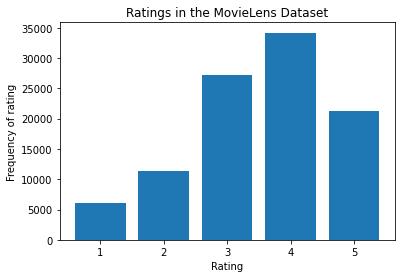

In [22]:
# This cell creates a histogram for all ratings in the MovieLens Dataset

import matplotlib.pyplot as plt

# read in the tab delimted data w/no header 
data = pd.read_csv(data_url, delimiter="\t", header=None)

# creating an array of movie ids  
mid = np.array(data[1])

# converting the column of ratings to an np array (3rd column)
ratings = np.array(data[2])

# Using plt.bar to plot data 
# get labels using np unique (1,2,3,4,5), plot against counts of those labels
labels, counts = np.unique(ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings in the MovieLens Dataset")
plt.gca().set_xticks(labels)
plt.show()



4863


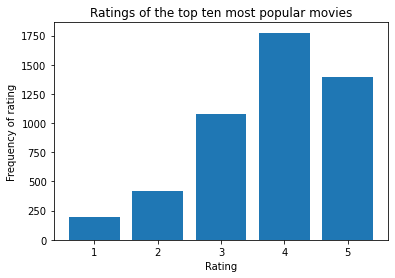

In [19]:
# This cell creates a visualizaiton for ratings of the ten most popular moveis 
# (movies which have received the most ratings)

# import Counter to help us get the top ten most popular movies (those that )
# appear most often 
from collections import Counter

# initializing counter and using most_common(10) to retrieve ten most common
# movie ids 
c = Counter(mid)
common_list = c.most_common(10)

# most_common returns (movie_id, frequency), so we want to get all the ids
top_ten = [x[0] for x in common_list]

# converting data to np array to make things easier (than working with df)
modified_data = np.array(data)

#retreiving the ratings from the data if their movie id is in top ten 
top_ten_data = [x[2] for x in modified_data if x[1] in top_ten]

# Using plt.bar to plot data 
# get labels using np unique (1,2,3,4,5), plot against counts of those labels
labels, counts = np.unique(top_ten_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of the top ten most popular movies")
plt.gca().set_xticks(labels)
plt.show()


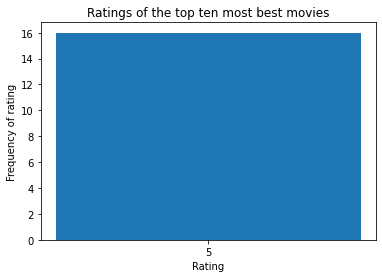

In [20]:
# Visualization of all ratings of the ten best movies 

# import nlargest to get the largest average ratings 
from heapq import nlargest

data = modified_data
# using data to make a dataframe to help us get the average rating of each 
# movie id 
data = pd.DataFrame(data= data, columns =["uid", "mid", "rating"])

# grouping dataframe by movie id and getting the average rating of each one
grouped = np.array(data.groupby('mid', as_index=False).rating.mean())

# getting the top ten average ratings from our previous grouped dataframe
best_ten = nlargest(10, grouped[:,1])

# retreiving the top ten average movie ids
best_ten_ids = [x[0] for x in grouped if x[1] in best_ten]

# retreiving the ratings corresponding to those ratings
best_ten_data = [x[2] for x in modified_data if x[1] in best_ten_ids]

# Using plt.bar to plot data 
# get labels using np unique (1,2,3,4,5), plot against counts of those labels

labels, counts = np.unique(best_ten_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of the top ten most best movies")
plt.gca().set_xticks(labels)
plt.show()



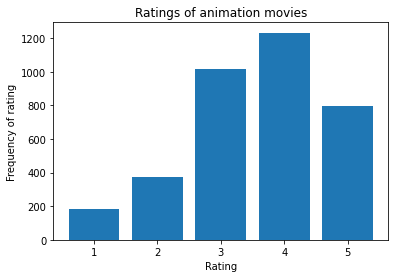

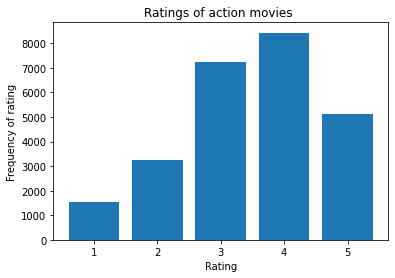

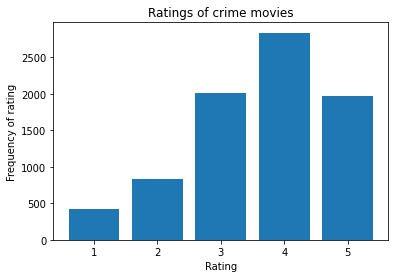

In [21]:
# Visualization of ratings of movies from three genres of your choice -> three separate visualizations 

# using movie_url to access movie data and convert to dataframe
movie_url = 'https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt'

# had to change encoding type because normal utf-8 didn't work 
movie_data = pd.read_csv(movie_url, delimiter="\t", header=None, encoding = 'latin-1')

# converting to np.array to make it easier to work with 
movie_data = np.array(movie_data)

# retreiving movie ids 
mid = np.array(movie_data[0])

# the column of x[3] will only be one if it is action -> retreive corresponding
# ids
action = [x[0] for x in movie_data if x[3] == 1]

# the column of x[5] will only be one if it is animation -> 
# retreive corresponding ids
animation = [x[0] for x in movie_data if x[5] == 1]
crime = [x[0] for x in movie_data if x[8] == 1]

# getting ratings from the movie ids found earlier 
animation_ratings =  [x[2] for x in modified_data if x[1] in animation]
action_ratings =  [x[2] for x in modified_data if x[1] in action]
crime_ratings =  [x[2] for x in modified_data if x[1] in crime]

# Using plt.bar to plot data 
# get labels using np unique (1,2,3,4,5), plot against counts of those labels

labels, counts = np.unique(animation_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of animation movies")
plt.gca().set_xticks(labels)
plt.show()

labels, counts = np.unique(action_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of action movies ")
plt.gca().set_xticks(labels)
plt.show()


labels, counts = np.unique(crime_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of crime movies")
plt.gca().set_xticks(labels)
plt.show()